                died  survived
post_discovery     1        11
pre_discovery      6         6

Manually calculated chi-square = 8.333333333333334
scipy.stats chi square statistic: 8.333333333333334
P-value: 0.03960235520756414

The distribution of observed frequencies was significantly different to that predicted by the null hypothesis (of equiprobability).

Manually calculated Phi coefficient: 0.5892556509887896


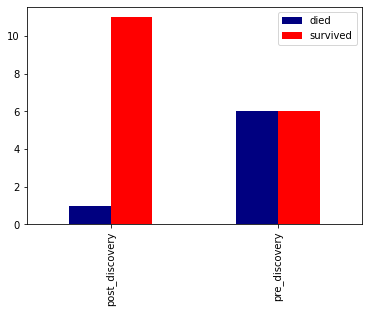

In [13]:
import numpy as np
import scipy.stats
import math
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations 

# data obtained from http://users.stat.ufl.edu/~winner/data/lister_ul.dat

# information from data (from http://users.stat.ufl.edu/~winner/data/lister_ul.txt ):

# 'Dataset:  lister_ul.dat
# Source: Lister (1870). Effects of the Antiseptic System of Treatment
# Upon the Salubrity of a Surgical Hospital. The Lancet, 1:4-6,40-42.

# Description: Results on survival of Upper Limb amputees prior to and
# after discovery and use of antiseptic.''

# Variables:
# Aniseptic (1=Post-Discovery,0=Pre-discovery)
# Death (1=Yes,0=No)
# Count (Number of cases)

dict1 = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [1,11,6,6]}

dframe = pd.DataFrame(dict1)

count_data = np.array([dframe['count'][0:2], dframe['count'][2:5]])

observed = pd.DataFrame(count_data, columns = ['died', 'survived'])
observed.index=['post_discovery', 'pre_discovery']

print(observed)
print()

# calculating the expected frequencies under an equiprobability null hypothesis

dict2 = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [6,6,6,6]}

dframe_2= pd.DataFrame(dict2)

count_data = np.array([dframe_2['count'][0:2], dframe_2['count'][2:5]])

expected = pd.DataFrame(count_data, columns = ['died', 'survived'])
expected.index=['post_discovery', 'pre_discovery']

# calculating the X-Squared Goodness-of-fit statistic

o_e_over_e1 = (observed.at['post_discovery', 'died']-expected.at['post_discovery', 'died'])**2/expected.at['post_discovery', 'died']
o_e_over_e2 = (observed.at['pre_discovery', 'died']-expected.at['pre_discovery', 'died'])**2/expected.at['pre_discovery', 'died']
o_e_over_e3 = (observed.at['post_discovery', 'survived']-expected.at['post_discovery', 'survived'])**2/expected.at['post_discovery', 'survived']
o_e_over_e4 = (observed.at['pre_discovery', 'survived']-expected.at['pre_discovery', 'survived'])**2/expected.at['pre_discovery', 'survived']

chi_square = o_e_over_e1 + o_e_over_e2 + o_e_over_e3 + o_e_over_e4

print('Manually calculated chi-square =', chi_square)

# checking result with scipy.stats

result = scipy.stats.chisquare(observed, expected, axis = None)

print('scipy.stats chi square statistic:', result[0])
print('P-value:', result[1])

if result[1] <= 0.05:
    print()
    print('The distribution of observed frequencies was significantly different to that predicted by the null hypothesis (of equiprobability).')
else:
    print('The distribution of observed frequencues was NOT significantly different to that predicted by the null hypothesis (of equiprobability).')
    
# plotting the data

observed.plot.bar(color = ['navy', 'red'])

# calculating effect size

n = sum(dframe['count'])

phi_coefficient = math.sqrt(chi_square/n)

print()
print('Manually calculated Phi coefficient:', phi_coefficient)